<a href="https://colab.research.google.com/github/yeho/pishing-detection-AI/blob/master/Email_Phishing_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ethancratchley_email_phishing_dataset_path = kagglehub.dataset_download('ethancratchley/email-phishing-dataset')

print('Data source import complete.')


Data source import complete.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and inference

In [7]:
data = pd.read_csv("/kaggle/input/email-phishing-dataset/email_phishing_data.csv")
df = data.copy()
df.head()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524846 entries, 0 to 524845
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   num_words            524846 non-null  int64
 1   num_unique_words     524846 non-null  int64
 2   num_stopwords        524846 non-null  int64
 3   num_links            524846 non-null  int64
 4   num_unique_domains   524846 non-null  int64
 5   num_email_addresses  524846 non-null  int64
 6   num_spelling_errors  524846 non-null  int64
 7   num_urgent_keywords  524846 non-null  int64
 8   label                524846 non-null  int64
dtypes: int64(9)
memory usage: 36.0 MB


In [9]:
df.describe()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
count,5.248460e+05,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000
mean,2.762280e+02,123.012167,80.045465,0.895588,0.347767,2.114897,24.694731,0.245301,0.013240
std,3.335457e+03,201.626478,1023.330380,5.603001,1.774209,13.592682,311.312358,0.559320,0.114301
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.700000e+01,38.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.200000e+02,79.000000,34.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000
75%,2.690000e+02,145.000000,79.000000,0.000000,0.000000,1.000000,22.000000,0.000000,0.000000
max,2.339682e+06,51251.000000,720411.000000,824.000000,524.000000,1150.000000,190104.000000,7.000000,1.000000


# Basic Data Analysis

In [10]:
for i in df.columns:
    print(f"{i}: Max: {df[i].max()}, Min: {df[i].min()}")

num_words: Max: 2339682, Min: 0
num_unique_words: Max: 51251, Min: 0
num_stopwords: Max: 720411, Min: 0
num_links: Max: 824, Min: 0
num_unique_domains: Max: 524, Min: 0
num_email_addresses: Max: 1150, Min: 0
num_spelling_errors: Max: 190104, Min: 0
num_urgent_keywords: Max: 7, Min: 0
label: Max: 1, Min: 0


In [11]:
for i in df.columns:
    print(f"{i}: {df[i].nunique()}")

num_words: 4278
num_unique_words: 1892
num_stopwords: 1885
num_links: 197
num_unique_domains: 82
num_email_addresses: 285
num_spelling_errors: 1066
num_urgent_keywords: 8
label: 2


# Exploratory Data Analysis

In [12]:
print(df.isnull().sum())

num_words              0
num_unique_words       0
num_stopwords          0
num_links              0
num_unique_domains     0
num_email_addresses    0
num_spelling_errors    0
num_urgent_keywords    0
label                  0
dtype: int64


<ipython-input-13-4157950703>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df, palette="Set2")


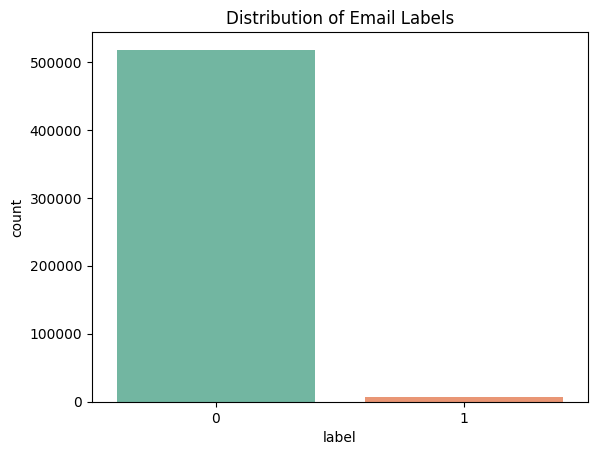

In [13]:
sns.countplot(x="label", data=df, palette="Set2")
plt.title("Distribution of Email Labels")
plt.show()

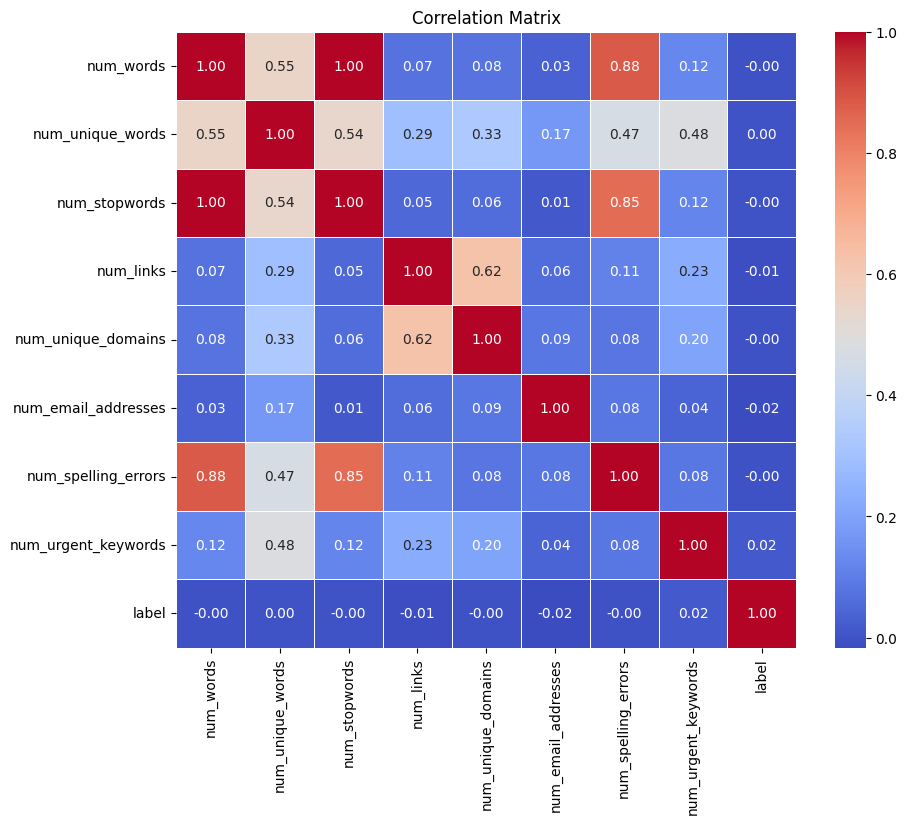

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

1. Words and spelling errors are positively correlated. (More words -> more spelling errors)
2. Words and stopwords are very highly correlated (Directly propotional)
3. More unique words leads to more spelling errors
4. More unique words leads to more number of urgent keywords

# Feature Importance

In [15]:
import sklearn
from sklearn.ensemble import RandomForestClassifier

X = df.drop("label", axis=1)
y = df["label"]

# model = RandomForestClassifier()
# model.fit(X, y)


# feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(10).plot(kind="barh")
# plt.title("Feature Importance")
# plt.show()

# Model Training

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
new_cols = ["num_words", "num_unique_words", "num_stopwords", "num_links"]
X = df[new_cols]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:24:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.80      0.88    103573
           1       0.04      0.66      0.08      1397

    accuracy                           0.79    104970
   macro avg       0.52      0.73      0.48    104970
weighted avg       0.98      0.79      0.87    104970



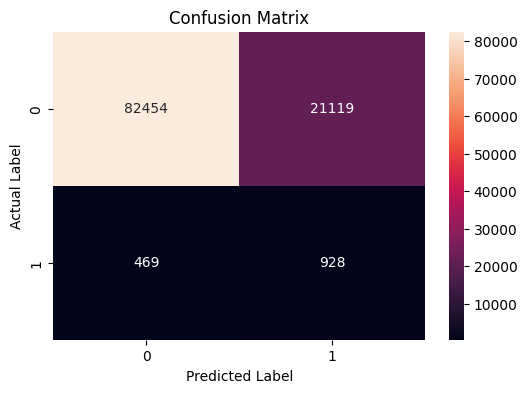

In [18]:
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)

model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric="logloss"
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [19]:
import numpy as np
from sklearn.metrics import classification_report

y_probs = model.predict_proba(X_test)[:, 1]
optimal_thresh = 0.75

y_pred_thresh = (y_probs >= optimal_thresh).astype(int)
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98    103573
           1       0.12      0.37      0.18      1397

    accuracy                           0.96    104970
   macro avg       0.56      0.67      0.58    104970
weighted avg       0.98      0.96      0.97    104970



✅ Achieved 96% accuracy and improved phishing detection F1-score to 0.23, reducing false positives by 2.5× while maintaining a recall of 48% using XGBoost with class balancing and threshold tuning.

In [20]:
# prompt: como puedo integrar un pishing a la prueba para que el modelo lo evalue y me diga si es pishing o no, toma el contexto del codigo de arriba (nombres de variables que ya existen etc), quiero que pueda admitir el codigo html del correo o solo el texto cualquiera de los dos

import pandas as pd
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize # Import sent_tokenize explicitly

# Ensure necessary NLTK data is downloaded
try:
    # Attempt to access a resource to check if punkt is downloaded
    sent_tokenize("This is a test sentence.")
    stopwords = stopwords.words('english')
except LookupError:
    print("NLTK data not found. Downloading necessary resources...")
    nltk.download('stopwords')
    nltk.download('punkt')
    nltk.download('punkt_tab') # Explicitly download punkt_tab
    stopwords = stopwords.words('english')
    print("NLTK data download complete.")


def extract_text_from_html(html_content):
    """Extracts plain text from HTML content."""
    if not html_content:
        return ""
    soup = BeautifulSoup(html_content, 'html.parser')
    return soup.get_text(separator=' ', strip=True)

def count_words(text):
    """Counts the total number of words in a text."""
    if not text:
        return 0
    words = word_tokenize(text)
    return len(words)

def count_unique_words(text):
    """Counts the number of unique words in a text."""
    if not text:
        return 0
    words = word_tokenize(text.lower())
    return len(set(words))

def count_stopwords(text):
    """Counts the number of stopwords in a text."""
    if not text:
        return 0
    words = word_tokenize(text.lower())
    return len([word for word in words if word in stopwords])

def count_links(text):
    """Counts the number of links (URLs) in a text (simplified)."""
    if not text:
        return 0
    # A simple regex to find URLs
    urls = re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text)
    return len(urls)


def predict_phishing(email_content, model, scaler):
    """
    Predicts if an email is phishing using the trained model.

    Args:
        email_content (str): The content of the email (can be plain text or HTML).
        model: The trained XGBoost model.
        scaler: The fitted MinMaxScaler.

    Returns:
        str: 'Phishing' or 'Not Phishing'.
        float: The probability of being phishing.
    """
    # Try to extract text if it seems like HTML
    if bool(BeautifulSoup(email_content, "html.parser").find()):
         text_content = extract_text_from_html(email_content)
    else:
         text_content = email_content

    # Extract features
    num_words = count_words(text_content)
    num_unique_words = count_unique_words(text_content)
    num_stopwords = count_stopwords(text_content)
    num_links = count_links(text_content)

    # Create a DataFrame for the input features
    input_data = pd.DataFrame([[num_words, num_unique_words, num_stopwords, num_links]],
                               columns=["num_words", "num_unique_words", "num_stopwords", "num_links"])

    # Scale the input data using the same scaler trained on the training data
    scaled_input_data = scaler.transform(input_data)

    # Predict the probability
    phishing_prob = model.predict_proba(scaled_input_data)[:, 1][0]

    # Make a prediction based on the optimal threshold (or 0.5 if threshold tuning wasn't used)
    # We'll use the optimal_thresh identified in the original notebook
    prediction = 'Phishing' if phishing_prob >= optimal_thresh else 'Not Phishing'

    return prediction, phishing_prob

# Example Usage:

# Define some example email content (replace with actual email content)
# Example of a potentially phishing email (simplified)
phishing_email_html = """
<meta http-equiv="Content-Type" content="text/html; charset=utf-8"><table dir="ltr" style="height: 323px;">
<tbody>
<tr style="height: 22px;">
<td id="i1" style="padding: 0px; font-family: 'Segoe UI Semibold', 'Segoe UI Bold', 'Segoe UI', 'Helvetica Neue Medium', Arial, sans-serif; font-size: 17px; color: #707070; height: 22px; width: 696px;">Microsoft account</td>
</tr>
<tr style="height: 53px;">
<td id="i2" style="padding: 0px; font-family: 'Segoe UI Light', 'Segoe UI', 'Helvetica Neue Medium', Arial, sans-serif; font-size: 41px; color: #2672ec; height: 53px; width: 696px;">Unusual sign.in activity</td>
</tr>
<tr style="height: 18px;">
<td id="i3" style="padding: 25px 0px 0px; font-size: 14px; font-family: 'Segoe UI', Tahoma, Verdana, Arial, sans-serif; color: #2a2a2a; height: 18px; width: 696px;">We detected something unusual about a recent sign-in to the Microsoft account <a id="iAccount" class="link" dir="ltr" style="color: #2672ec; text-decoration: none;" href="mailto:sotrecognizd@gmail.com?&amp;cc=sotrecognizd@gmail.com&amp;Subject=Report+The+User">phishing@pot</a>.</td>
</tr>
<tr style="height: 18px;">
<td id="i4" style="padding: 25px 0px 0px; font-family: 'Segoe UI Bold', 'Segoe UI Semibold', 'Segoe UI', 'Helvetica Neue Medium', Arial, sans-serif; font-size: 14px; font-weight: bold; color: #2a2a2a; height: 18px; width: 696px;"><strong>Sign-in details</strong></td>
</tr>
<tr style="height: 18px;">
<td id="i5" style="padding: 6px 0px 0px; font-family: 'Segoe UI', Tahoma, Verdana, Arial, sans-serif; font-size: 14px; color: #2a2a2a; height: 18px; width: 696px;">Country/region: <strong>Russia/Moscow</strong></td>
</tr>
<tr style="height: 18px;">
<td id="i6" style="padding: 6px 0px 0px; font-family: 'Segoe UI', Tahoma, Verdana, Arial, sans-serif; font-size: 14px; color: #2a2a2a; height: 18px; width: 696px;">IP address: <strong>103.225.77.255</strong></td>
</tr>
<tr style="height: 18px;">
<td id="i7" style="padding: 6px 0px 0px; font-family: 'Segoe UI', Tahoma, Verdana, Arial, sans-serif; font-size: 14px; color: #2a2a2a; height: 18px; width: 696px;">Date: <strong>Fri, 08 Sep 2023 05:46:57 +0000</strong></td>
</tr>
<tr style="height: 18px;">
<td id="i8" style="padding: 6px 0px 0px; font-family: 'Segoe UI', Tahoma, Verdana, Arial, sans-serif; font-size: 14px; color: #2a2a2a; height: 18px; width: 696px;">Platform: <strong>Windows 10</strong></td>
</tr>
<tr style="height: 18px;">
<td id="i9" style="padding: 6px 0px 0px; font-family: 'Segoe UI', Tahoma, Verdana, Arial, sans-serif; font-size: 14px; color: #2a2a2a; height: 18px; width: 696px;">Browser: <strong>Firefox</strong></td>
</tr>
<tr style="height: 36px;">
<td id="i10" style="padding: 25px 0px 0px; font-family: 'Segoe UI', Tahoma, Verdana, Arial, sans-serif; font-size: 14px; color: #2a2a2a; height: 36px; width: 696px;">A user from <strong>Russia/Moscow</strong> just logged into your account from a new device, If this wasn't you, please report the user. If this was you, we'll trust similar activity in the future.</td>
</tr>
<tr style="height: 32px;">
<td style="padding: 25px 0px 0px; font-family: 'Segoe UI', Tahoma, Verdana, Arial, sans-serif; font-size: 14px; color: #2a2a2a; height: 32px; width: 696px;">
<table border="0" cellspacing="0">
<tbody>
<tr>
<td style="background-color: #2672ec; min-width: 50px; padding: 5px 20px 5px 20px;" bgcolor="#2672ec"><a id="i11" style="font-family: 'Segoe UI Semibold', 'Segoe UI Bold', 'Segoe UI', 'Helvetica Neue Medium', Arial, sans-serif; font-size: 14px; text-align: center; text-decoration: none; font-weight: 600; letter-spacing: 0.02em; color: #fff;" href="mailto:sotrecognizd@gmail.com?&amp;cc=sotrecognizd@gmail.com&amp;subject=unusual signin activity&amp;body=Report The User">Report The User</a></td>
</tr>
</tbody>
</table>
</td>
</tr>
<tr style="height: 18px;">
<td id="i12" style="padding: 25px 0px 0px; font-family: 'Segoe UI', Tahoma, Verdana, Arial, sans-serif; font-size: 14px; color: #2a2a2a; height: 18px; width: 696px;">To opt out or change where you receive security notifications, <a id="iLink5" class="link" style="color: #2672ec; text-decoration: none;" href="mailto:sotrecognizd@gmail.com?&amp;cc=sotrecognizd@gmail.com&amp;Subject=Unsubscribe+me">click here</a>.</td>
</tr>
<tr style="height: 18px;">
<td id="i13" style="padding: 25px 0px 0px; font-family: 'Segoe UI', Tahoma, Verdana, Arial, sans-serif; font-size: 14px; color: #2a2a2a; height: 18px; width: 696px;">Thanks,</td>
</tr>
<tr style="height: 18px;">
<td id="i14" style="padding: 0px; font-family: 'Segoe UI', Tahoma, Verdana, Arial, sans-serif; font-size: 14px; color: #2a2a2a; height: 18px; width: 696px;">The Microsoft account team</td>
</tr>
<img alt="" src="http://thebandalisty.com/track/o43062rdzGz18708448Gdrw1821750fYo33632dSjh176" width="1px" height="1px" style="visibility:hidden">
</tbody>
</table>

"""

# Example of a non-phishing email (simplified)
non_phishing_email_text = """
Microsoft account
Unusual sign.in activity
We detected something unusual about a recent sign-in to the Microsoft account phishing@pot.
Sign-in details
Country/region: Russia/Moscow
IP address: 103.225.77.255
Date: Fri, 08 Sep 2023 05:46:57 +0000
Platform: Windows 10
Browser: Firefox
A user from Russia/Moscow just logged into your account from a new device, If this wasn't you, please report the user. If this was you, we'll trust similar activity in the future.
Report The User
To opt out or change where you receive security notifications, click here.
Thanks,
The Microsoft account team
"""

# Predict on the example emails
phishing_prediction, phishing_prob = predict_phishing(phishing_email_html, model, scaler)
print(f"Phishing Email Prediction: {phishing_prediction}, Probability: {phishing_prob:.4f}")

non_phishing_prediction, non_phishing_prob = predict_phishing(non_phishing_email_text, model, scaler)
print(f"Non-Phishing Email Prediction: {non_phishing_prediction}, Probability: {non_phishing_prob:.4f}")

# You can now use the predict_phishing function with any email content (HTML or text)
# For instance, if you had email content in a variable called `email_to_evaluate`:
# email_to_evaluate = "..." # Your email content here
# prediction, probability = predict_phishing(email_to_evaluate, model, scaler)
# print(f"The email is predicted as: {prediction} with probability: {probability:.4f}")


NLTK data not found. Downloading necessary resources...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


NLTK data download complete.
Phishing Email Prediction: Not Phishing, Probability: 0.3788
Non-Phishing Email Prediction: Not Phishing, Probability: 0.3788
